# Funções Lineares nos Parâmetros (Regressão Linear)

Na aula anterior, falamos sobre o problema de ajustar uma função (curva) a um conjunto de pontos $(x_1,y_1), \ldots, (x_n,y_n)$.

Nomeclatura:
* $y$ é chamada **resposta** ou **variável dependente**,
* $x$ é chamado **preditor** ou **variável independente**.

Diferente do problema de interpolação, as funções que iremos considerar podem não interpolar os pontos, isto é, passar exatamente por eles. Por essa razão, foi necessário definir medidas da qualidade do ajuste.

## Qualidade do Ajuste

Falamos sobre três medidas:

1. Erro máximo
$$E_\infty(f) = \max_{i=1\,\ldots,n} |f(x_i) - y_i|$$

2. Erro médio (ou erro $L_1$)
$$E_1(f) = \frac{1}{n} \sum_{i=1}^n |f(x_i) - y_i|$$

3. Raiz do erro médio quadrático (ou erro $L_2$)
$$E_2(f) = \sqrt{\frac{1}{n} \sum_{i=1}^n (f(x_i) - y_i)^2}$$

Ranqueando as métricas de qualidade em ordem crescente segundo à sensiblidade à *outliers*, vimos que
$$
E_1 \prec E_2 \prec E_\infty. 
$$
Vimos também que $E_2(f)$ é mais fácil de ser minimizada que $E_1(f)$. A minimização de $E_2(f)$, ou mais especificamente de $D(\beta) = \sum_{i=1}^n (f(x_i) - y_i)^2$ dá origem ao método dos quadrados mínimos.

## Método dos quadrados mínimos

Foi desenvolvido no quadro.

Hoje vamos estudar um caso específico de ajuste de curva que acontece quando a função é linear nos parâmetros. O problema de ajuste, neste caso, é chamado de **Regressão Linear**.

## Exemplos de Regressão Linear

* Regressão Linear...
$$
f(x) = \beta_0 + \beta_1 x
$$

*  Regressão Linear...
$$
f(x) = \beta_0 x + \beta_1 \textrm{sen}(x)
$$

*  Regressão Linear...
$$
f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots \beta_p x^p
$$

## Regressão Linear Simples

Deduzimos na aula anterior:

$$
\begin{bmatrix}
n & \sum x_i \\
\sum x_i & \sum x_i ^2
\end{bmatrix}
\beta
= 
\begin{bmatrix}
\sum y_i \\
\sum y_i x_i
\end{bmatrix}
$$

Resolvendo-se o sistema acima, temos:

$$
\beta_1 = \frac{\sum x_i \sum y_i -n \sum x_i y_i}{\left(\sum x_i\right)^2 -n \sum x_i^2}
 \quad \textrm{e} \quad
\beta_0 = \frac{\sum y_i - \beta_1 \sum x_i}{n}.
$$

Considere o exemplo a seguir.

In [1]:
import numpy as np

x = np.array([0.3,2.7,4.5,5.9,7.8])
y = np.array([1.8,1.9,3.1,3.9,3.3])

M = np.vstack([x,y,x**2,x*y]).T
M

array([[ 0.3 ,  1.8 ,  0.09,  0.54],
       [ 2.7 ,  1.9 ,  7.29,  5.13],
       [ 4.5 ,  3.1 , 20.25, 13.95],
       [ 5.9 ,  3.9 , 34.81, 23.01],
       [ 7.8 ,  3.3 , 60.84, 25.74]])

In [3]:
M.sum(axis=0)

array([ 21.2 ,  14.  , 123.28,  68.37])

In [5]:
n = len(x)
beta1 = ()/()
beta0 = ()/
print(beta0,beta1)

1.6559415428845228 0.26982510781025404


**Retornar ao exemplo de y=ax+b com erros de medição. **

### Um exemplo mais realístico

Imagine que a gente queira estudar a relação entre a latitude de uma região e a mortalidade por câncer de pele. Sabe-se que quanto menor a latitude (mais próximo do Equador), maior a incidência de raios solares.  

Será que a latitude é um bom preditor para a mortalidade por câncer de pele?

Vamos usar o conjunto de dados desse link:

https://onlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/skincancer.txt

In [10]:
import pandas as pd
df = pd.read_table('skincancer.txt',sep='\s+')

## Diagrama de dispersão (scatter plot)

Gráfico que mostra a natureza da relação intrínseca entre duas variáveis estudadas.

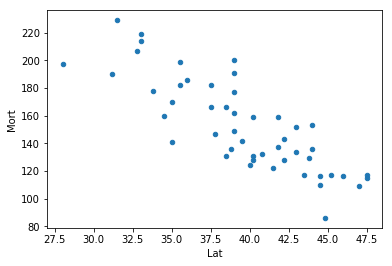

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot.scatter('Lat','Mort')

In [48]:
x = df.Lat
y = df.Mort

n = len(x)
XtX = np.array([[n, x.sum()],[x.sum(), (x**2).sum()]])
XtY = np.array([[y.sum()],[(x*y).sum()]])
print(XtX)
print(XtY)

[[4.900000e+01 1.937100e+03]
 [1.937100e+03 7.759919e+04]]
[[  7491.]
 [290039.]]


In [49]:
beta = np.linalg.solve(XtX,XtY)
beta

array([[389.18935103],
       [ -5.97763574]])

Text(0,0.5,'Mortalidade Câncer de Pele')

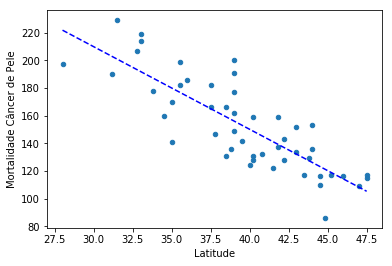

In [50]:
x_intervalo = np.array([x.min(),x.max()])
yhat = beta[0] + beta[1]*x_intervalo
df.plot.scatter('Lat','Mort')
plt.plot(x_intervalo,yhat,'b--',label='reg. linear')
plt.xlabel('Latitude')
plt.ylabel('Mortalidade Câncer de Pele')

## Regressão linear múltipla

Em alguns casos, possuímos mais de um preditor (variável independente). No caso de

$$f(x) = \beta_0 x + \beta_1 \textrm{sen(x)},$$

$x$ e $\textrm{sen(x)}$ são preditores.

Um outro exemplo de regressão linear múltipla pode ser obtido a partir do conjunto de dados do câncer de pele:

$$
f(x) = \beta_0 + \beta_1 \textrm{Lat}(x) + \beta_2 \textrm{Ocean}(x)
$$

Vamos fazer o ajuste da função usando o método dos quadrados mínimos.

FEITO NO QUADRO.

In [51]:
x1 = df.Lat
x2 = df.Ocean

XtX = np.array([[n, x1.sum(), x2.sum()],
                [x1.sum(), (x1*x1).sum(), (x1*x2).sum()],
                [x2.sum(), (x1*x2).sum(), (x2*x2).sum()]])
XtY = np.array([y.sum(), (y*x1).sum(), (y*x2).sum()])
beta = np.linalg.solve(XtX,XtY)
beta

array([360.69047381,  -5.4887734 ,  20.43044214])

In [52]:
yhat2 = beta[0] + beta[1]*x1 + beta[2]*x2
color=pd.Series(['Blue']*n)
color[df.Ocean==0] = 'Orange'


Text(0,0.5,'Mortalidade Câncer de Pele')

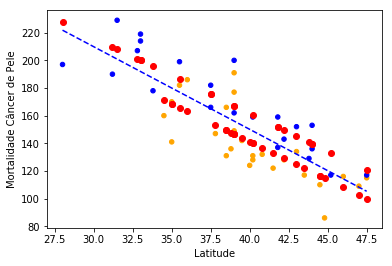

In [53]:
df.plot.scatter('Lat','Mort',c=color)
plt.plot(x_intervalo,yhat,'b--',label='reg. linear simples')
plt.plot(x1,yhat2,'ro',label='reg. linear múltipla')
plt.xlabel('Latitude')
plt.ylabel('Mortalidade Câncer de Pele')

Vejamos mais um exemplo. 

http://lib.stat.cmu.edu/DASL/Datafiles/Cereals.html

In [54]:
df2 = pd.read_table('cereal.txt',sep='\s+')


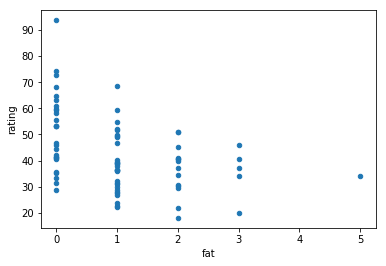

In [60]:
df2.plot.scatter('fat','rating')

In [62]:
x1 = df2.fat
x2 = df2.sugars
y = df2.rating
n = len(x1)

XtX = np.array([[n, x1.sum(), x2.sum()],
                [x1.sum(), (x1*x1).sum(), (x1*x2).sum()],
                [x2.sum(), (x1*x2).sum(), (x2*x2).sum()]])
XtY = np.array([y.sum(), (y*x1).sum(), (y*x2).sum()])
beta = np.linalg.solve(XtX,XtY)
beta

array([61.0886002 , -3.06577983, -2.21281821])

**Q:** Quantas operações são necessárias para montar o sistema linear?

## Regressão Polinomial

A regressão polinomial é um caso específico de regressão linear múltipla, onde a função considerada é um polinômio:

$$
f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_p x^p
$$

**Q**: Isto é uma regressão linear?

Quais equações devem ser satisfeitas para encontrarmos os $\beta$s?

FEITO NO QUADRO.

**Q**: Qual a diferença da *regressão polinomial* e da *interpolação polinomial*?